In [57]:
import numpy
import pandas

import matplotlib.pyplot as pyplot
import seaborn

In [2]:
titanic = pandas.read_csv("titanic.csv")

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data = pandas.get_dummies(titanic, columns=["Pclass", "Sex", "Embarked"])[["Age", "SibSp", "Pclass_1", "Pclass_2", "Pclass_3", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Survived"]]

data

,Age,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.0,1,False,False,True,False,True,False,False,True,0
1,38.0,1,True,False,False,True,False,True,False,False,1
2,26.0,0,False,False,True,True,False,False,False,True,1
3,35.0,1,True,False,False,True,False,False,False,True,1
4,35.0,0,False,False,True,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,False,True,False,False,True,False,False,True,0
887,19.0,0,True,False,False,True,False,False,False,True,1
888,NaN,1,False,False,True,True,False,False,False,True,0
889,26.0,0,True,False,False,False,True,True,False,False,1


In [39]:
X = data[["SibSp", "Pclass_2", "Pclass_1", "Sex_male", "Embarked_C", "Embarked_S", "Survived"]].values.astype(int)

X

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
y = data["Age"].values

y

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [41]:
nan_index = data["Age"].isna()

nan_index

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [44]:
X1 = X[~nan_index]

X1.shape

(714, 7)

In [45]:
y1 = y[~nan_index]

y1.shape

(714,)

In [47]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(X1, y1)

reg.score(X1, y1)

0.3906846279870707

In [49]:
reg.predict([
    [1, 0, 1, 1, 0, 0, 0]
])

array([42.69258381])

In [54]:
data1 = data.copy()

data1.loc[nan_index, ["Age"]] = reg.predict(X[nan_index]).round(0)

data1

,Age,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.0,1,False,False,True,False,True,False,False,True,0
1,38.0,1,True,False,False,True,False,True,False,False,1
2,26.0,0,False,False,True,True,False,False,False,True,1
3,35.0,1,True,False,False,True,False,False,False,True,1
4,35.0,0,False,False,True,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,False,True,False,False,True,False,False,True,0
887,19.0,0,True,False,False,True,False,False,False,True,1
888,33.0,1,False,False,True,True,False,False,False,True,0
889,26.0,0,True,False,False,False,True,True,False,False,1


In [56]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Pclass_1    891 non-null    bool   
 3   Pclass_2    891 non-null    bool   
 4   Pclass_3    891 non-null    bool   
 5   Sex_female  891 non-null    bool   
 6   Sex_male    891 non-null    bool   
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
 10  Survived    891 non-null    int64  
dtypes: bool(8), float64(1), int64(2)
memory usage: 28.0 KB


<Axes: ylabel='Density'>

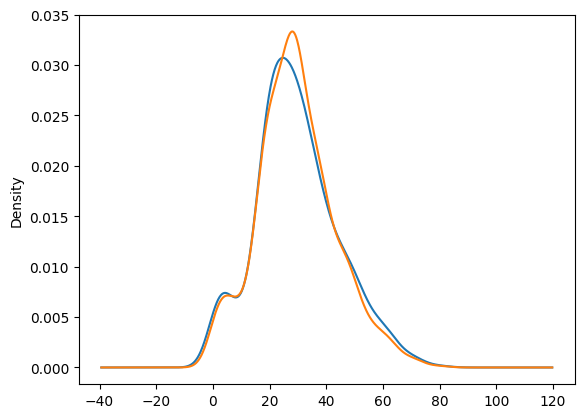

In [59]:
data["Age"].plot.density()
data1["Age"].plot.density()

In [66]:
X2 = data1.values[:, :10].astype(int)

pandas.DataFrame(X2).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       891 non-null    int64
 1   1       891 non-null    int64
 2   2       891 non-null    int64
 3   3       891 non-null    int64
 4   4       891 non-null    int64
 5   5       891 non-null    int64
 6   6       891 non-null    int64
 7   7       891 non-null    int64
 8   8       891 non-null    int64
 9   9       891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


In [74]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(penalty="l2")

reg.fit(X2, data["Survived"])

reg.score(X2, data["Survived"])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8114478114478114